## Loan Default Prediction

> ****Financial institutions, including banks, credit unions, and government lenders, provide loan services to individuals and businesses.
A major concern for these institutions is loan defaults, where borrowers fail to repay their loans as agreed.
To manage this risk, many institutions utilize machine learning algorithms to predict which borrowers are most likely to default.****

> The Dataset:
This specific dataset originates from Coursera's Loan Default Prediction Challenge.
It offers an opportunity to practice and test machine learning skills on a real-world problem.
The dataset comprises a significant amount of data, with 255,347 rows and 18 columns.
Presumably, these columns contain information relevant to borrowers and their loan characteristics.

> The Goal:
The primary objective is to utilize the data to build a model that accurately predicts loan defaults.
This would enable financial institutions to:
Identify high-risk borrowers at an early stage.
Implement targeted interventions, such as loan restructuring or financial counseling, to prevent defaults.
Make more informed lending decisions, potentially reducing overall risk exposure.

In [2]:
# load the data 
import numpy as np
import pandas as pd
loan=pd.read_csv("Loan_default.csv")

In [3]:
loan.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
#label encoding
from sklearn.preprocessing import LabelEncoder
# Assuming df is your DataFrame
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns
for col in categorical_columns:
    loan[col] = label_encoder.fit_transform(loan[col])

c:\Users\sivap\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


c:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sivap\anaconda3\lib\si

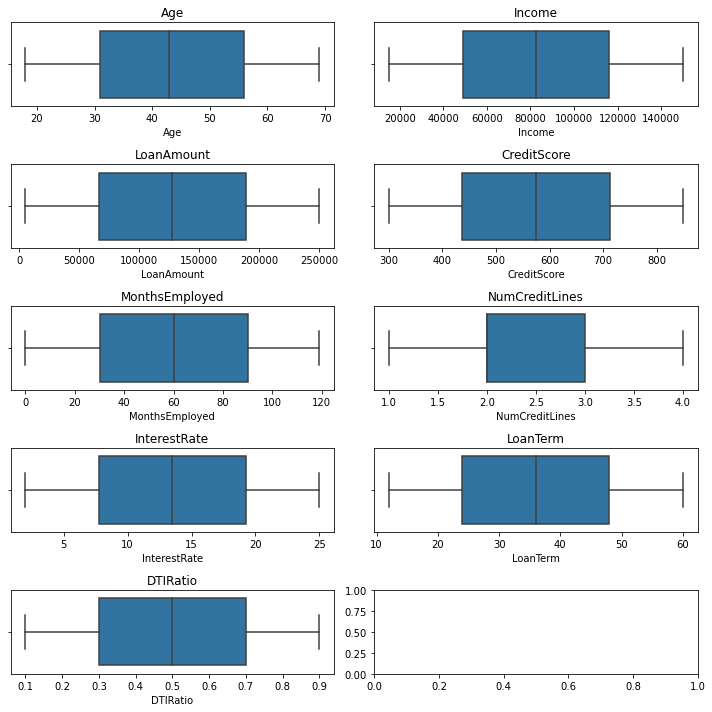

In [6]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt
columns = loan.columns
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
sns.boxplot(loan.iloc[:,1],ax=axs[0, 0],orient='h').set_title(columns[1])
sns.boxplot(loan.iloc[:,2],ax=axs[0, 1],orient='h').set_title(columns[2])
sns.boxplot(loan.iloc[:,3],ax=axs[1, 0],orient='h').set_title(columns[3])
sns.boxplot(loan.iloc[:,4],ax=axs[1, 1],orient='h').set_title(columns[4])
sns.boxplot(loan.iloc[:,5],ax=axs[2, 0],orient='h').set_title(columns[5])
sns.boxplot(loan.iloc[:,6],ax=axs[2, 1],orient='h').set_title(columns[6])
sns.boxplot(loan.iloc[:,7],ax=axs[3, 0],orient='h').set_title(columns[7])
sns.boxplot(loan.iloc[:,8],ax=axs[3, 1],orient='h').set_title(columns[8])
sns.boxplot(loan.iloc[:,9],ax=axs[4, 0],orient='h').set_title(columns[9])
fig.tight_layout()

In [7]:
# Check if our observations are correct
np.round(loan.pivot_table(index='Default',values=['InterestRate','LoanAmount','NumCreditLines'],aggfunc=('mean','std')),2)

InterestRate       LoanAmount           NumCreditLines      
                mean   std       mean       std           mean   std
Default                                                             
0              13.18  6.61  125353.66  70708.10           2.49  1.12
1              15.90  6.32  144515.31  69547.82           2.59  1.12

In [8]:
# Check if our observations are correct
np.round(loan.pivot_table(index='Default',values=['Age','Income','MonthsEmployed'],aggfunc=('mean','std')),2)

Age           Income          MonthsEmployed       
          mean    std      mean      std           mean    std
Default                                                       
0        44.41  14.89  83899.17  38498.8          60.76  34.56
1        36.56  13.90  71844.72  40785.1          50.24  33.88

In [9]:
loan.isnull()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Split Dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(loan.drop(columns=['LoanID','Default']),loan['Default'], test_size=0.25,random_state=42)

print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (191510, 16)
y_train: (191510,)
x_test: (63837, 16)
y_test: (63837,)


## ML models - Ensemble methods

> #### Ensemble methods
     Bagging
     Boosting
     Stacking
     Voting

In [11]:
from sklearn.ensemble import  BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Bagging Method

In [12]:
# Create a base classifier (e.g., DecisionTreeClassifier):
base_clf = DecisionTreeClassifier()

# Create the bagging classifier:
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=100, random_state=42)

# Train and evaluate (similar to Voting):
bagging_clf.fit(x_train, y_train)
y_pred = bagging_clf.predict(x_test)
bagging_accuracy = accuracy_score(y_test, y_pred)
print("Bagging accuracy:", bagging_accuracy)


Bagging accuracy: 0.8849100051694159


### Boosting method

In [13]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
boosting_accuracy = accuracy_score(y_test, y_pred)
print("Boosting accuracy:", boosting_accuracy)


Boosting accuracy: 0.8865704842019518


### stacking Method

In [14]:
# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier on the training data
stacking_classifier.fit(x_train, y_train)

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(x_test)

# Evaluate the performance
stack_accuracy = accuracy_score(y_test, stacking_predictions)
print(f'Accuracy of Stacking Classifier: {stack_accuracy}')

Accuracy of Stacking Classifier: 0.8861162022024844


## Tree based Learning Methods

### Random Forest:

In [15]:


rf_clf = RandomForestClassifier(n_estimators=100,  random_state=42)

# Train and evaluate:
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
random_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest accuracy:", random_accuracy)




Random Forest accuracy: 0.885661920203017


###  Decision Tree:

In [16]:

dt_clf = DecisionTreeClassifier(random_state=42)

# Train and evaluate:
dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy:", dt_accuracy)




Decision Tree accuracy: 0.8033742187132854


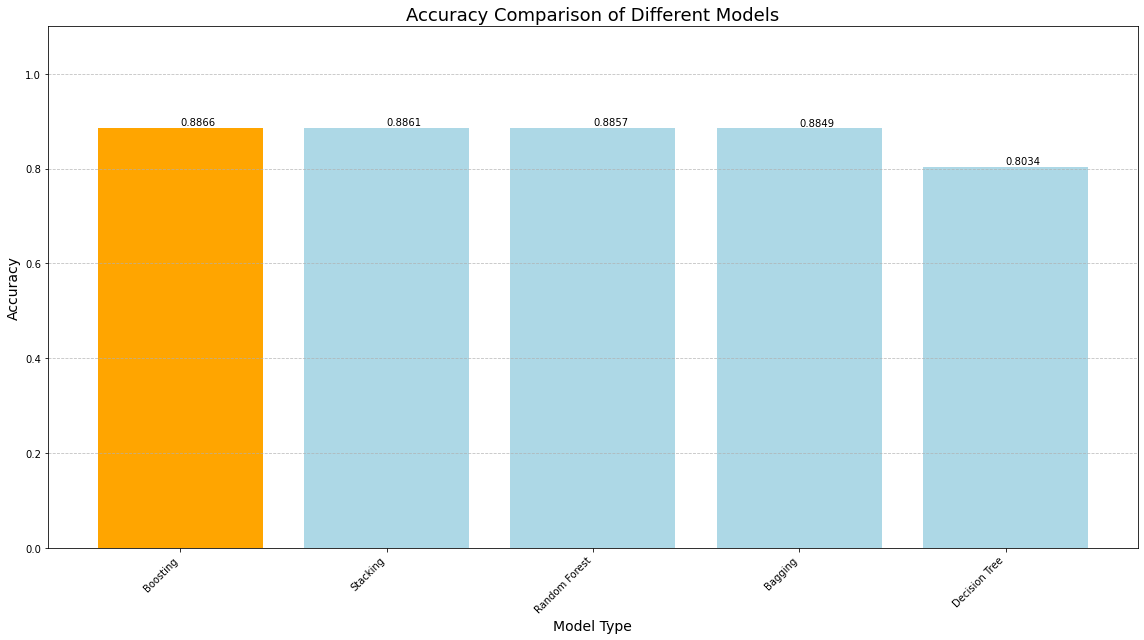

In [45]:
import matplotlib.pyplot as plt

# Accuracy scores for different models
accuracies = {
    "Decision Tree": dt_accuracy,
    "Random Forest": random_accuracy,
    "Stacking": stack_accuracy,
    "Boosting": boosting_accuracy,
    "Bagging": bagging_accuracy
}


accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Create the bar chart
plt.figure(figsize=(16, 9))  # Adjust figure size as needed

colors = ['lightblue' if model != 'Boosting' else 'orange' for model in accuracies.keys()]
plt.bar(accuracies.keys(), accuracies.values(), color=colors)
# Customize chart elements
plt.xlabel("Model Type", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Comparison of Different Models", fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1.1)  # Set y-axis limits for precision

plt.grid(axis='y', linestyle='--', alpha=0.8)  # Add grid lines

# Annotate each bar with 8 decimal places
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}")  # Format with 8 decimals

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## voting classifier

Ensemble Model Accuracy: 0.8860848724094177


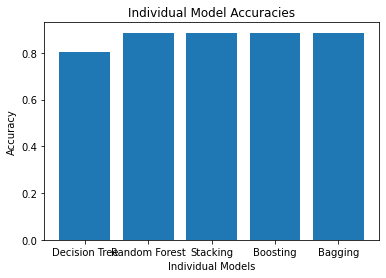

In [28]:

from sklearn.ensemble import VotingClassifier

# Create a list of tuples with (model_name, model_instance)
models = [ ( "Decision Tree", dt_clf), ("Random Forest",rf_clf), ( "Stacking", stacking_classifier), 
          ("Boosting", gb_clf),("Bagging", bagging_clf)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')  # 'hard' for majority voting


# Fit the Voting Classifier on the training data
voting_classifier.fit(x_train, y_train)

# Predictions
predictions = voting_classifier.predict(x_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {accuracy}')




In [34]:
# Create the bar chart
# Calculate and print accuracy
accuracy_ensemble = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.8860848724094177


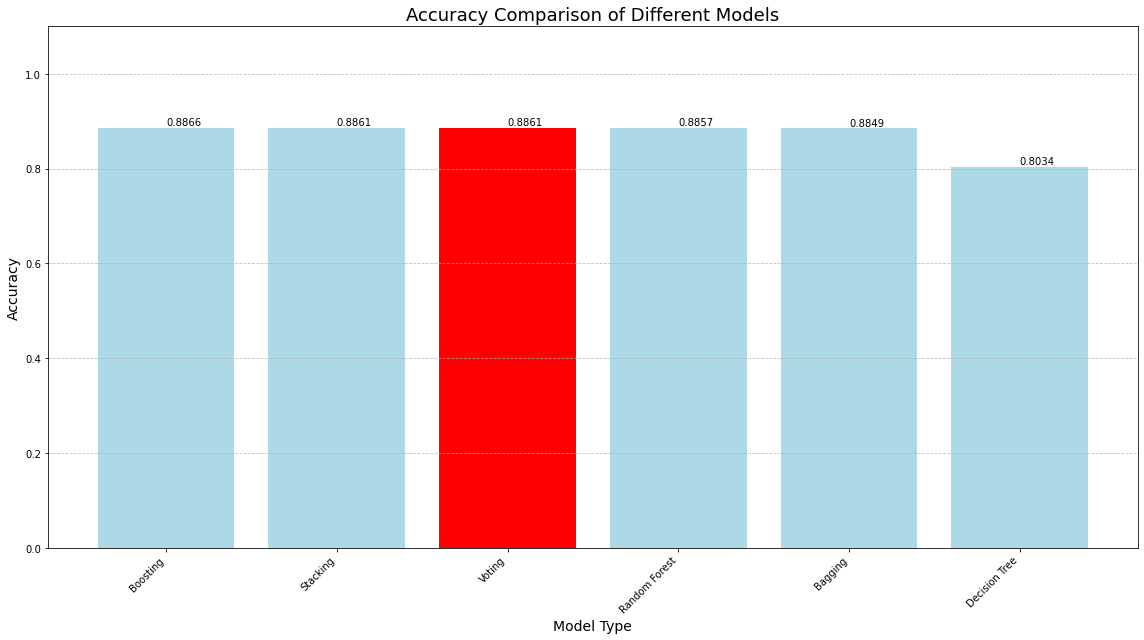

In [41]:
import matplotlib.pyplot as plt

# Accuracy scores for different models
accuracies = {
    "Decision Tree": dt_accuracy,
    "Random Forest": random_accuracy,
    "Stacking": stack_accuracy,
    "Boosting": boosting_accuracy,
    "Bagging": bagging_accuracy,
    "Voting":accuracy_ensemble  # Add accuracy for the ensemble model
}

# Sort the accuracies dictionary by values in descending order
accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Create the bar chart
plt.figure(figsize=(16, 9))  # Adjust figure size as needed

# Define colors for each bar
colors = ['lightblue' if model != 'Voting' else 'red' for model in accuracies.keys()]

# Plot the bars
plt.bar(accuracies.keys(), accuracies.values(), color=colors)

# Customize chart elements
plt.xlabel("Model Type", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Comparison of Different Models", fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1.1)  # Set y-axis limits for precision

plt.grid(axis='y', linestyle='--', alpha=0.8)  # Add grid lines

# Annotate each bar with 8 decimal places
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}")  # Format with 8 decimals

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
